<a href="https://colab.research.google.com/github/karthiklakkur1/Crop-weed-extension/blob/main/soilimagedataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jayaprakashpondy/soil-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 144M/144M [00:01<00:00, 104MB/s] 


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jayaprakashpondy/soil-image-dataset/versions/1


In [3]:
import shutil

source_path = "/root/.cache/kagglehub/datasets/jayaprakashpondy/soil-image-dataset/versions/1"
destination_path = "/content/drive/MyDrive/soil-image-dataset"

# Copy the dataset to Google Drive
shutil.copytree(source_path, destination_path)

print(f"Dataset copied to: {destination_path}")


Dataset copied to: /content/drive/MyDrive/soil-image-dataset


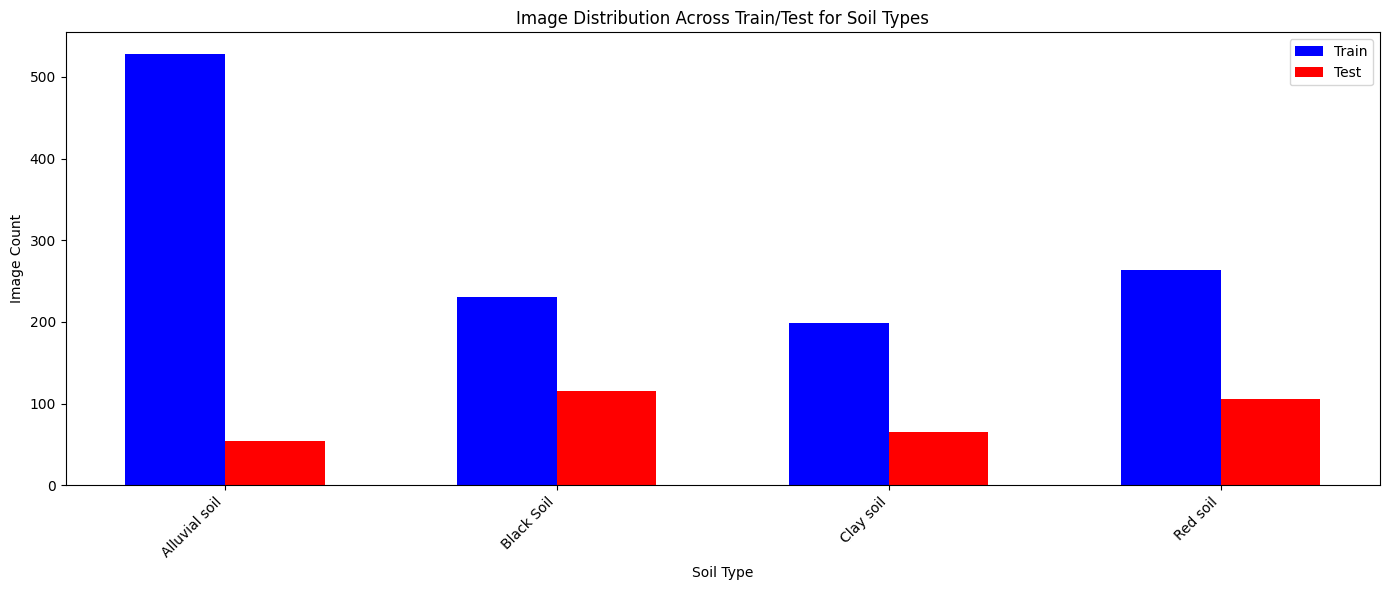

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Define dataset paths
dataset_root = "/content/drive/MyDrive/soil-image-dataset/Dataset"
splits = ["Train", "test"]

# Function to count images per soil type
def count_images_in_split(split):
    split_path = os.path.join(dataset_root, split)
    soil_counts = {}

    # Loop through soil type subfolders
    for soil_type in os.listdir(split_path):
        soil_folder_path = os.path.join(split_path, soil_type)

        if os.path.isdir(soil_folder_path):
            num_images = len(os.listdir(soil_folder_path))  # Count image files
            soil_counts[soil_type] = num_images

    return soil_counts

# Get image counts for train & test
image_counts = {split: count_images_in_split(split) for split in splits}

# Extract data for plotting
soil_types = sorted(set(image_counts["Train"].keys()) | set(image_counts["test"].keys()))
x = np.arange(len(soil_types))  # X-axis positions

# Get counts for each split, defaulting to 0 if missing
train_counts = [image_counts["Train"].get(soil, 0) for soil in soil_types]
test_counts = [image_counts["test"].get(soil, 0) for soil in soil_types]

# Plot grouped bar chart
bar_width = 0.3
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width / 2, train_counts, width=bar_width, label="Train", color="blue")
plt.bar(x + bar_width / 2, test_counts, width=bar_width, label="Test", color="red")

# Labels and formatting
plt.xlabel("Soil Type")
plt.ylabel("Image Count")
plt.title("Image Distribution Across Train/Test for Soil Types")
plt.xticks(x, soil_types, rotation=45, ha="right")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [14]:
import os
import cv2
import pandas as pd

# Define dataset location
dataset_root = "/content/drive/MyDrive/soil-image-dataset/Dataset"
splits = ["Train", "test"]

# Initialize results list
image_data = []

# Process each split (Train, test)
for split in splits:
    split_path = os.path.join(dataset_root, split)

    # Loop through soil type categories
    for soil_type in os.listdir(split_path):
        soil_folder_path = os.path.join(split_path, soil_type)

        # Ensure it is a directory
        if os.path.isdir(soil_folder_path):
            images = sorted(os.listdir(soil_folder_path))[:10]  # Select first 10 images

            # Process each image
            for img_name in images:
                img_path = os.path.join(soil_folder_path, img_name)
                image = cv2.imread(img_path)

                if image is not None:
                    height, width = image.shape[:2]
                    aspect_ratio = round(width / height, 2)  # Aspect ratio rounded to 2 decimal places

                    # Store image data
                    image_data.append([split, soil_type, img_name, width, height, aspect_ratio])

# Create a DataFrame for better visualization
df = pd.DataFrame(image_data, columns=["Split", "Soil Type", "Image Name", "Width", "Height", "Aspect Ratio"])

# Display results
print(df.head(30))  # Shows data for multiple soil types


    Split      Soil Type                                         Image Name  \
0   Train       Red soil  1000_F_233167094_JhQz9xvHtlN5UyT3zt748JiJolOSi...   
1   Train       Red soil                          15kg-red-soil-500x500.png   
2   Train       Red soil                                  250px-Ultisol.jpg   
3   Train       Red soil               2560px-A_red_soil_crop_field.JPG.jpg   
4   Train       Red soil                                              3.jpg   
5   Train       Red soil  5-red-soil-topspot-original-imaftmfanswghcfr.jpeg   
6   Train       Red soil                                              5.jpg   
7   Train       Red soil                            51em0GmiApL._SX466_.jpg   
8   Train       Red soil           61050549-red-soil-texture-background.jpg   
9   Train       Red soil                                     61AysVsqgL.jpg   
10  Train      Clay soil                                 1523893451317.jpeg   
11  Train      Clay soil  91714675-background-of-red

In [16]:
import os
import cv2

# Define dataset location
dataset_root = "/content/drive/MyDrive/soil-image-dataset/Dataset"
splits = ["Train", "test"]
target_size = (256, 256)

# Function to resize images and overwrite them
def resize_images_in_split(split):
    split_path = os.path.join(dataset_root, split)

    # Loop through soil type folders
    for soil_type in os.listdir(split_path):
        soil_folder_path = os.path.join(split_path, soil_type)

        if os.path.isdir(soil_folder_path):
            for img_name in os.listdir(soil_folder_path):
                img_path = os.path.join(soil_folder_path, img_name)

                # Ensure file is an image before processing
                if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                    image = cv2.imread(img_path)

                    if image is not None:
                        resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

                        # Save resized image (overwrite original)
                        cv2.imwrite(img_path, resized_image)

resize_images_in_split("Train")
resize_images_in_split("test")

print("All images resized to 256x256 successfully!")


All images resized to 256x256 successfully!
